In [1]:
!pip install cheche_pm

In [2]:
!pip install dwave-ocean-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2

In [3]:
from collections import defaultdict
from itertools import product
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dwave.inspector as inspector
from dimod import ConstrainedQuadraticModel, CQM, SampleSet, cqm_to_bqm, to_networkx_graph
from dwave.system import LeapHybridCQMSampler
from dimod.vartypes import Vartype
from dimod import Binary, quicksum
import time
from cheche_pm import Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from google.colab import userdata

In [4]:
endpoint = 'https://cloud.dwavesys.com/sapi'
token = userdata.get('dwave_leap')

In [5]:
url = 'https://raw.githubusercontent.com/ceche1212/medium_rcpsp_dwave_cqm/main/RCPSP_19_instance.rcp'

In [6]:
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Write the content to a file
    with open("instance.rcp", "w") as file:
        file.write(response.text)
    print("File downloaded and saved as 'instance.rcp'")
else:
    print("Failed to download the file. Status code:", response.status_code)

File downloaded and saved as 'instance.rcp'


In [7]:
project = Project.from_rangen_1_rcp_file('instance.rcp')

In [8]:
project.create_project_dict()

In [9]:
pd.DataFrame(project.PROJECT).T

,idx,description,duration,precedence,resources,cost
Start,0,Start of the project,0,None,"[0, 0]",0
2,1,activity_2,3,[Start],"[1, 1]",0
3,2,activity_3,3,[Start],"[2, 8]",0
4,3,activity_4,3,[Start],"[5, 5]",0
5,4,activity_5,2,[Start],"[7, 3]",0
6,5,activity_6,2,[Start],"[5, 6]",0
7,6,activity_7,2,[2],"[0, 0]",0
8,7,activity_8,3,[6],"[4, 4]",0
9,8,activity_9,9,[5],"[4, 6]",0
10,9,activity_10,4,[Start],"[5, 4]",0


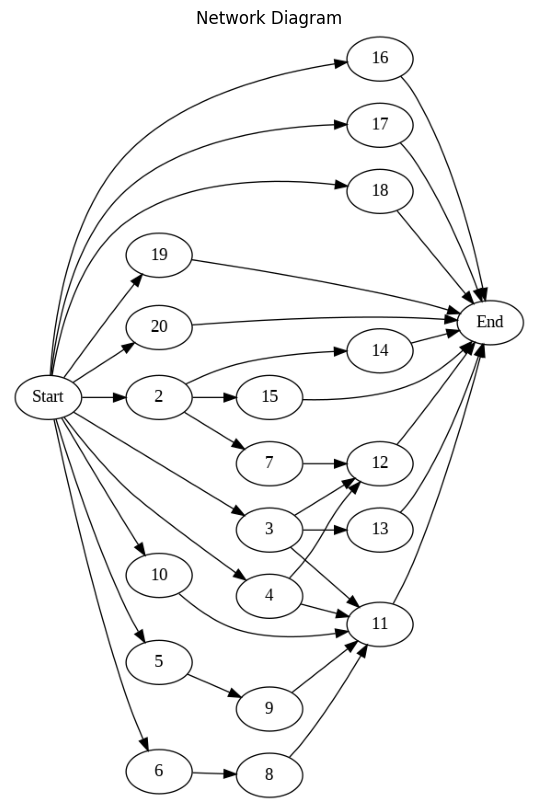

In [10]:
project.plot_network_diagram()

In [11]:
n,p,S,U,C,naive_ph = project.produce_outputs_for_MILP().values()

In [12]:
naive_ph

65

In [13]:
heuristic = project.run_all_pl_heuristics(max_resources=C)
new_ph = heuristic['makespan']

  0%|          | 0/24 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/cheche_pm/cheche_pm.py:1282: UserWarning: !WARNING: Running critical path method...
  warnings.warn("!WARNING: Running critical path method...")
100%|██████████| 24/24 [00:00<00:00, 38.07it/s]


In [14]:
new_ph

40

In [15]:
print(f"{(naive_ph - new_ph)*(n+2)} qubits saved thanks to the new time horizon")

525 qubits saved thanks to the new time horizon


# Creating the CQM

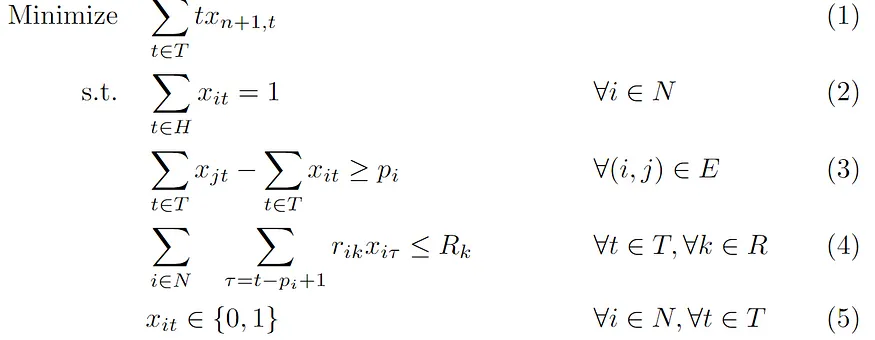

In [16]:
(R, J, T) = (range(len(C)), range(len(p)), range(new_ph))

# Create empty model
cqm=ConstrainedQuadraticModel()

# Create binary variables
x = {(i, t): Binary(f'x{i}_{t}') for i in J for t in T}

# Create objective function (1)
objective = quicksum(t*x[(n+1,t)] for t in T)
cqm.set_objective(objective)

# Add constraint (2)
for a in J:
  cqm.add_constraint( quicksum(x[(a,t)] for t in T) == 1 )

# Add constraint (3) Precedence constraints
for (j,s) in S:
  cqm.add_constraint( quicksum( t*x[(s,t)] - t*x[(j,t)] for t in T ) >= p[j])

# Add constraint (4) Resource capacity constraints
for (r, t) in product(R, T):
  r_c = quicksum( U[j][r]*x[(j,t2)] for j in J for t2 in range(max(0, t - p[j] + 1), t + 1))
  cqm.add_constraint( r_c <= C[r] )

print("CQM model created with number of variables = ",len(cqm.variables))

CQM model created with number of variables =  840


In [17]:
cqm_sampler = LeapHybridCQMSampler(endpoint=endpoint, token=token,)

In [18]:
problem_name = 'RCPSP_Medium_Article'

sampleset = cqm_sampler.sample_cqm(cqm,label=problem_name)

In [19]:
annealing_solutions = len(sampleset) # number of solutions inside sampleset

In [20]:
running_time = sampleset.info['run_time'] # running time reported in microseconds

In [21]:
print(f"Annealing stoped after {running_time/1e6:.3f} seconds. {annealing_solutions} annealing samples obtained")

Annealing stoped after 5.321 seconds. 76 annealing samples obtained


# Extracting the solution

In [22]:
df_sampleset = sampleset.to_pandas_dataframe(sample_column=True)
df_sampleset = df_sampleset[['sample','energy','is_feasible']]
df_sampleset = df_sampleset.sort_values(by = ['is_feasible','energy'], ascending = [False,True])

In [23]:
df_sampleset

,sample,energy,is_feasible
0,"{'x0_0': 1.0, 'x0_1': 0.0, 'x0_10': 0.0, 'x0_1...",39.0,True
1,"{'x0_0': 1.0, 'x0_1': 0.0, 'x0_10': 0.0, 'x0_1...",39.0,True
3,"{'x0_0': 1.0, 'x0_1': 0.0, 'x0_10': 0.0, 'x0_1...",39.0,True
4,"{'x0_0': 1.0, 'x0_1': 0.0, 'x0_10': 0.0, 'x0_1...",39.0,True
5,"{'x0_0': 1.0, 'x0_1': 0.0, 'x0_10': 0.0, 'x0_1...",39.0,True
...,...,...,...
72,"{'x0_0': 1.0, 'x0_1': 0.0, 'x0_10': 0.0, 'x0_1...",49.0,False
73,"{'x0_0': 1.0, 'x0_1': 0.0, 'x0_10': 0.0, 'x0_1...",51.0,False
74,"{'x0_0': 0.0, 'x0_1': 1.0, 'x0_10': 0.0, 'x0_1...",58.0,False
75,"{'x0_0': 1.0, 'x0_1': 0.0, 'x0_10': 0.0, 'x0_1...",59.0,False


In [24]:
try:
  feasible_sampleset = sampleset.filter(lambda row: row.is_feasible)
  best = feasible_sampleset.first
except:
  print('No Feasible solution found')

In [25]:
Z = best.energy

In [26]:
print(f"Solution obtained with a final project duration of {Z} days")

Solution obtained with a final project duration of 39.0 days


In [27]:
project.PROJECT

{'Start': {'idx': 0,
  'description': 'Start of the project',
  'duration': 0,
  'precedence': None,
  'resources': [0, 0],
  'cost': 0,
  'resource_1': 0,
  'resource_2': 0},
 '2': {'idx': 1,
  'description': 'activity_2',
  'duration': 3,
  'precedence': ['Start'],
  'resources': [1, 1],
  'cost': 0,
  'resource_1': 1,
  'resource_2': 1},
 '3': {'idx': 2,
  'description': 'activity_3',
  'duration': 3,
  'precedence': ['Start'],
  'resources': [2, 8],
  'cost': 0,
  'resource_1': 2,
  'resource_2': 8},
 '4': {'idx': 3,
  'description': 'activity_4',
  'duration': 3,
  'precedence': ['Start'],
  'resources': [5, 5],
  'cost': 0,
  'resource_1': 5,
  'resource_2': 5},
 '5': {'idx': 4,
  'description': 'activity_5',
  'duration': 2,
  'precedence': ['Start'],
  'resources': [7, 3],
  'cost': 0,
  'resource_1': 7,
  'resource_2': 3},
 '6': {'idx': 5,
  'description': 'activity_6',
  'duration': 2,
  'precedence': ['Start'],
  'resources': [5, 6],
  'cost': 0,
  'resource_1': 5,
  'resour

In [28]:
X_out = best.sample

In [29]:
SCHEDULE = dict()
for act in project.PROJECT:

  i = project.PROJECT[act]['idx']
  for t in range(new_ph):
    key = f'x{i}_{t}'
    if X_out[key] == 1:
      row = {'ES':t,'EF':t+p[i]}
      SCHEDULE[act] = row
      print(act,row)


Start {'ES': 0, 'EF': 0}
2 {'ES': 0, 'EF': 3}
3 {'ES': 5, 'EF': 8}
4 {'ES': 19, 'EF': 22}
5 {'ES': 2, 'EF': 4}
6 {'ES': 17, 'EF': 19}
7 {'ES': 18, 'EF': 20}
8 {'ES': 19, 'EF': 22}
9 {'ES': 8, 'EF': 17}
10 {'ES': 15, 'EF': 19}
11 {'ES': 31, 'EF': 34}
12 {'ES': 22, 'EF': 25}
13 {'ES': 25, 'EF': 31}
14 {'ES': 4, 'EF': 8}
15 {'ES': 8, 'EF': 15}
16 {'ES': 32, 'EF': 34}
17 {'ES': 3, 'EF': 4}
18 {'ES': 4, 'EF': 5}
19 {'ES': 0, 'EF': 2}
20 {'ES': 34, 'EF': 39}
End {'ES': 39, 'EF': 39}


In [30]:
pd.DataFrame(SCHEDULE).T

,ES,EF
Start,0,0
2,0,3
3,5,8
4,19,22
5,2,4
6,17,19
7,18,20
8,19,22
9,8,17
10,15,19


# Generating a gantt chart

In [33]:
schedule_df = project.generate_datetime_schedule(SCHEDULE)

In [35]:
schedule_df

,D,precedence,ES,EF,ES_date,EF_date,ES_weekday,EF_weekday,calendar_duration,critical
Start,0,,0,0,2024-08-15,2024-08-15,Thursday,Thursday,0,False
2,3,Start,0,3,2024-08-15,2024-08-18,Thursday,Sunday,3,True
3,3,Start,5,8,2024-08-20,2024-08-23,Tuesday,Friday,3,True
4,3,Start,19,22,2024-09-03,2024-09-06,Tuesday,Friday,3,True
5,2,Start,2,4,2024-08-17,2024-08-19,Saturday,Monday,2,True
6,2,Start,17,19,2024-09-01,2024-09-03,Sunday,Tuesday,2,True
7,2,2,18,20,2024-09-02,2024-09-04,Monday,Wednesday,2,True
8,3,6,19,22,2024-09-03,2024-09-06,Tuesday,Friday,3,True
9,9,5,8,17,2024-08-23,2024-09-01,Friday,Sunday,9,True
10,4,Start,15,19,2024-08-30,2024-09-03,Friday,Tuesday,4,True


In [38]:
project.plot_date_gantt(schedule_df)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



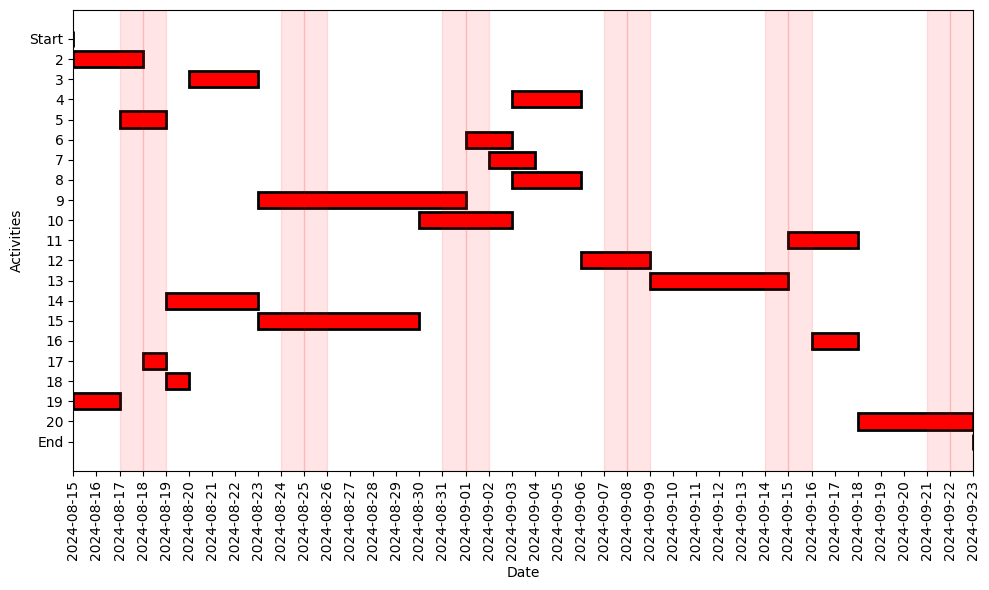

<Figure size 640x480 with 0 Axes>

In [40]:
project.plot_date_gantt(schedule_df,plot_type = 'matplotlib')
